# Order Delivery Time Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [134]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LR_Assignment_Porter/porter_data_1.csv')

In [135]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [137]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [138]:
# Convert categorical features to category type
# from dataset dictionary, we can identify that market_id, store_primary_category and order_protocol can be treated as categorical variables.

df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [140]:
df.describe()

created_at           actual_delivery_time  \
count                         175777                         175777   
mean   2015-02-04 19:57:50.009631744  2015-02-04 20:44:02.190406144   
min              2015-01-21 15:22:03            2015-01-21 16:07:03   
25%              2015-01-29 01:31:19            2015-01-29 02:16:30   
50%              2015-02-05 02:41:26            2015-02-05 03:34:33   
75%              2015-02-12 01:04:32            2015-02-12 01:48:24   
max              2015-02-18 06:00:44            2015-02-18 06:51:10   
std                              NaN                            NaN   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders       distance  
count             175777.000000  175777.000000  
mean                  58.230115      21.843090  
min                   -6.000000       0.000000  
25%                   17.000000      15.360000  
50%                   41.000000      21.760000  
75%                   85.000000      28.120000  
max                  285.000000      83.520000  
std                   52.731043       8.748712

In [141]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [142]:
# Calculate time taken in minutes
df['timeTakenInMins'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [143]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  timeTakenInMins  
0                      21.0     34.44             47.0  
1                       2.0     27.60             44.0  
2                      18.0     11.56             55.0  
3                       8.0     31.80             59.0  
4                       7.0      8.20             46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [144]:
# Extract the hour and day of week from the 'created_at' timestamp
df['Hour'] = df['created_at'].dt.hour
df['Day'] = df['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['Day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)


In [145]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  timeTakenInMins  Hour       Day  \
0                      21.0     34.44             47.0    22    Friday   
1                       2.0     27.60             44.0    21   Tuesday   
2                      18.0     11.56             55.0     0    Monday   
3                       8.0     31.80             59.0     3  Thursday   
4                       7.0      8.20             46.0     2   Tuesday   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

In [146]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  timeTakenInMins           175777 non-null  float64 
 13  Hour                      175

In [149]:
# convert Day as well to category
df['Day'] = df['Day'].astype('category')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [272]:
# Define target variable (y) and features (X)
X = df.drop('timeTakenInMins', axis=1)
y = df['timeTakenInMins']

In [273]:
X.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'Hour', 'Day', 'isWeekend'],
      dtype='object')

In [152]:
X.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  Hour       Day  \
0                14.0                      21.0     34.44    22    Friday   
1                 2.0                       2.0     27.60    21   Tuesday   
2                 6.0                      18.0     11.56     0    Monday   
3                 6.0                       8.0     31.80     3  Thursday   
4                 5.0                       7.0      8.20     2   Tuesday   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

In [153]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: timeTakenInMins, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [322]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [323]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140621, 15), (35156, 15), (140621,), (35156,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [156]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend', 'timeTakenInMins']
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol', 'Hour', 'Day']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [324]:
# For EDA, lets form a df that consists of only training data, including the target variable(timeTakenInMins)
df_train = pd.concat([X_train, y_train], axis=1)

In [277]:
# let's do EDA on this df_train, so that we don't apply EDA on test data.
df_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
42111        3.0                      7            2.0            1      1350   
58452        2.0                     46            5.0            5      4285   
20644        4.0                     45            2.0            6      7880   
79735        4.0                     45            2.0            3      3660   
167933       1.0                      4            5.0            5      8575   

        num_distinct_items  min_item_price  max_item_price  \
42111                    1            1350            1350   
58452                    5             495             900   
20644                    3            1195            1450   
79735                    3             975            1450   
167933                   5            1200            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance  Hour       Day  isWeekend  timeTakenInMins  
42111       9.60    20    Monday          0             32.0  
58452      34.56     2  Saturday          1             71.0  
20644      34.92     3    Friday          0             62.0  
79735      25.76     2  Saturday          1             54.0  
167933     17.72     2  Thursday          0             56.0

In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  Hour                      140621 non-null  int32   
 13  Day                       14062

In [160]:
# utility functions
def plot_histograms(df, cols=None, n_cols=3, figsize_per_plot=(5, 4), kde=True):
    if cols is None:
        cols = df.select_dtypes(include='number').columns.tolist()

    n_plots = len(cols)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize_per_plot[0]*n_cols, figsize_per_plot[1]*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=kde, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_boxplots(df, cols=None, n_cols=3, figsize_per_plot=(5, 4)):
    if cols is None:
        cols = df.select_dtypes(include='number').columns.tolist()

    n_plots = len(cols)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize_per_plot[0]*n_cols, figsize_per_plot[1]*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Value')

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

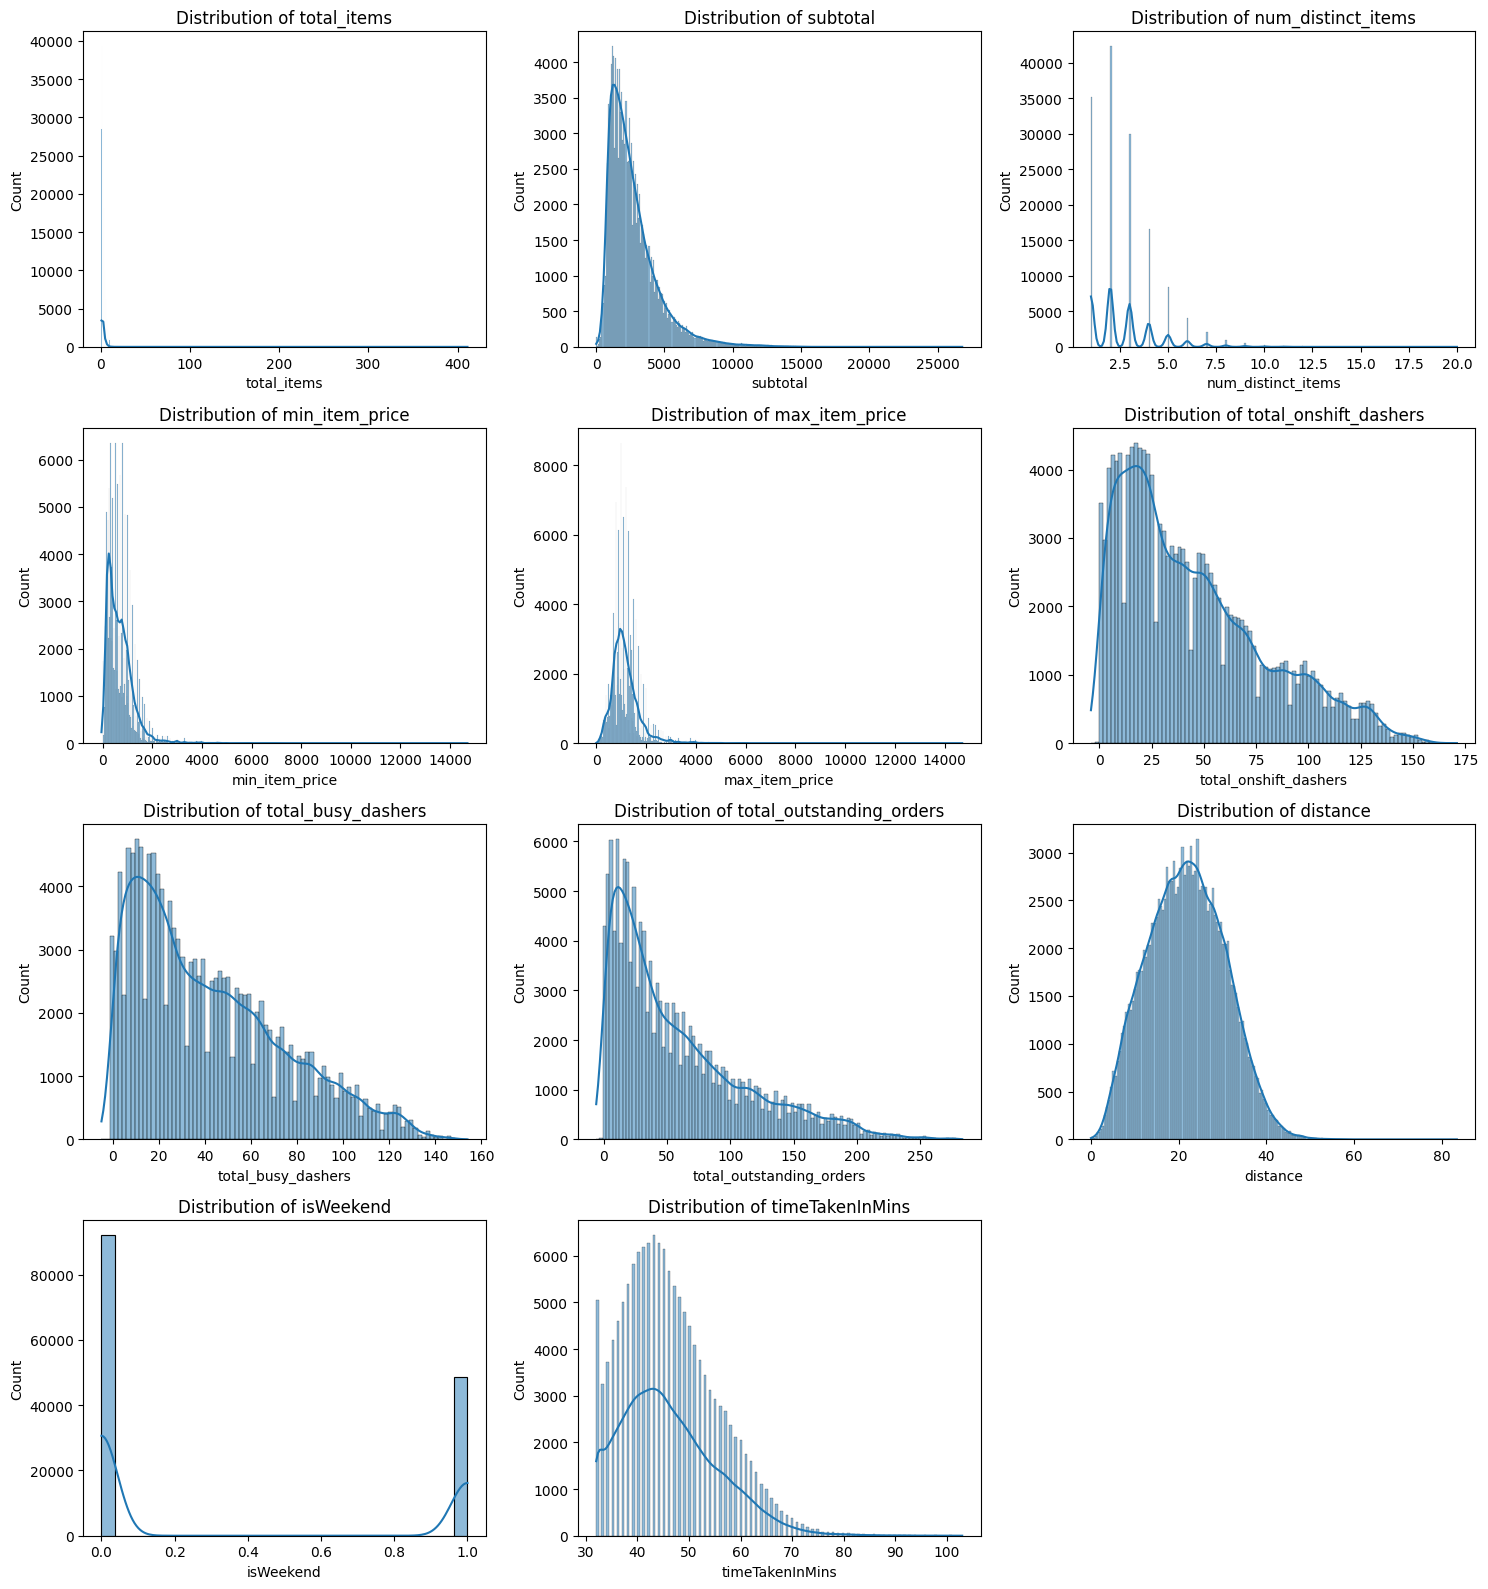

In [38]:
# Plot distributions for all numerical columns
plot_histograms(df_train, numerical_columns)

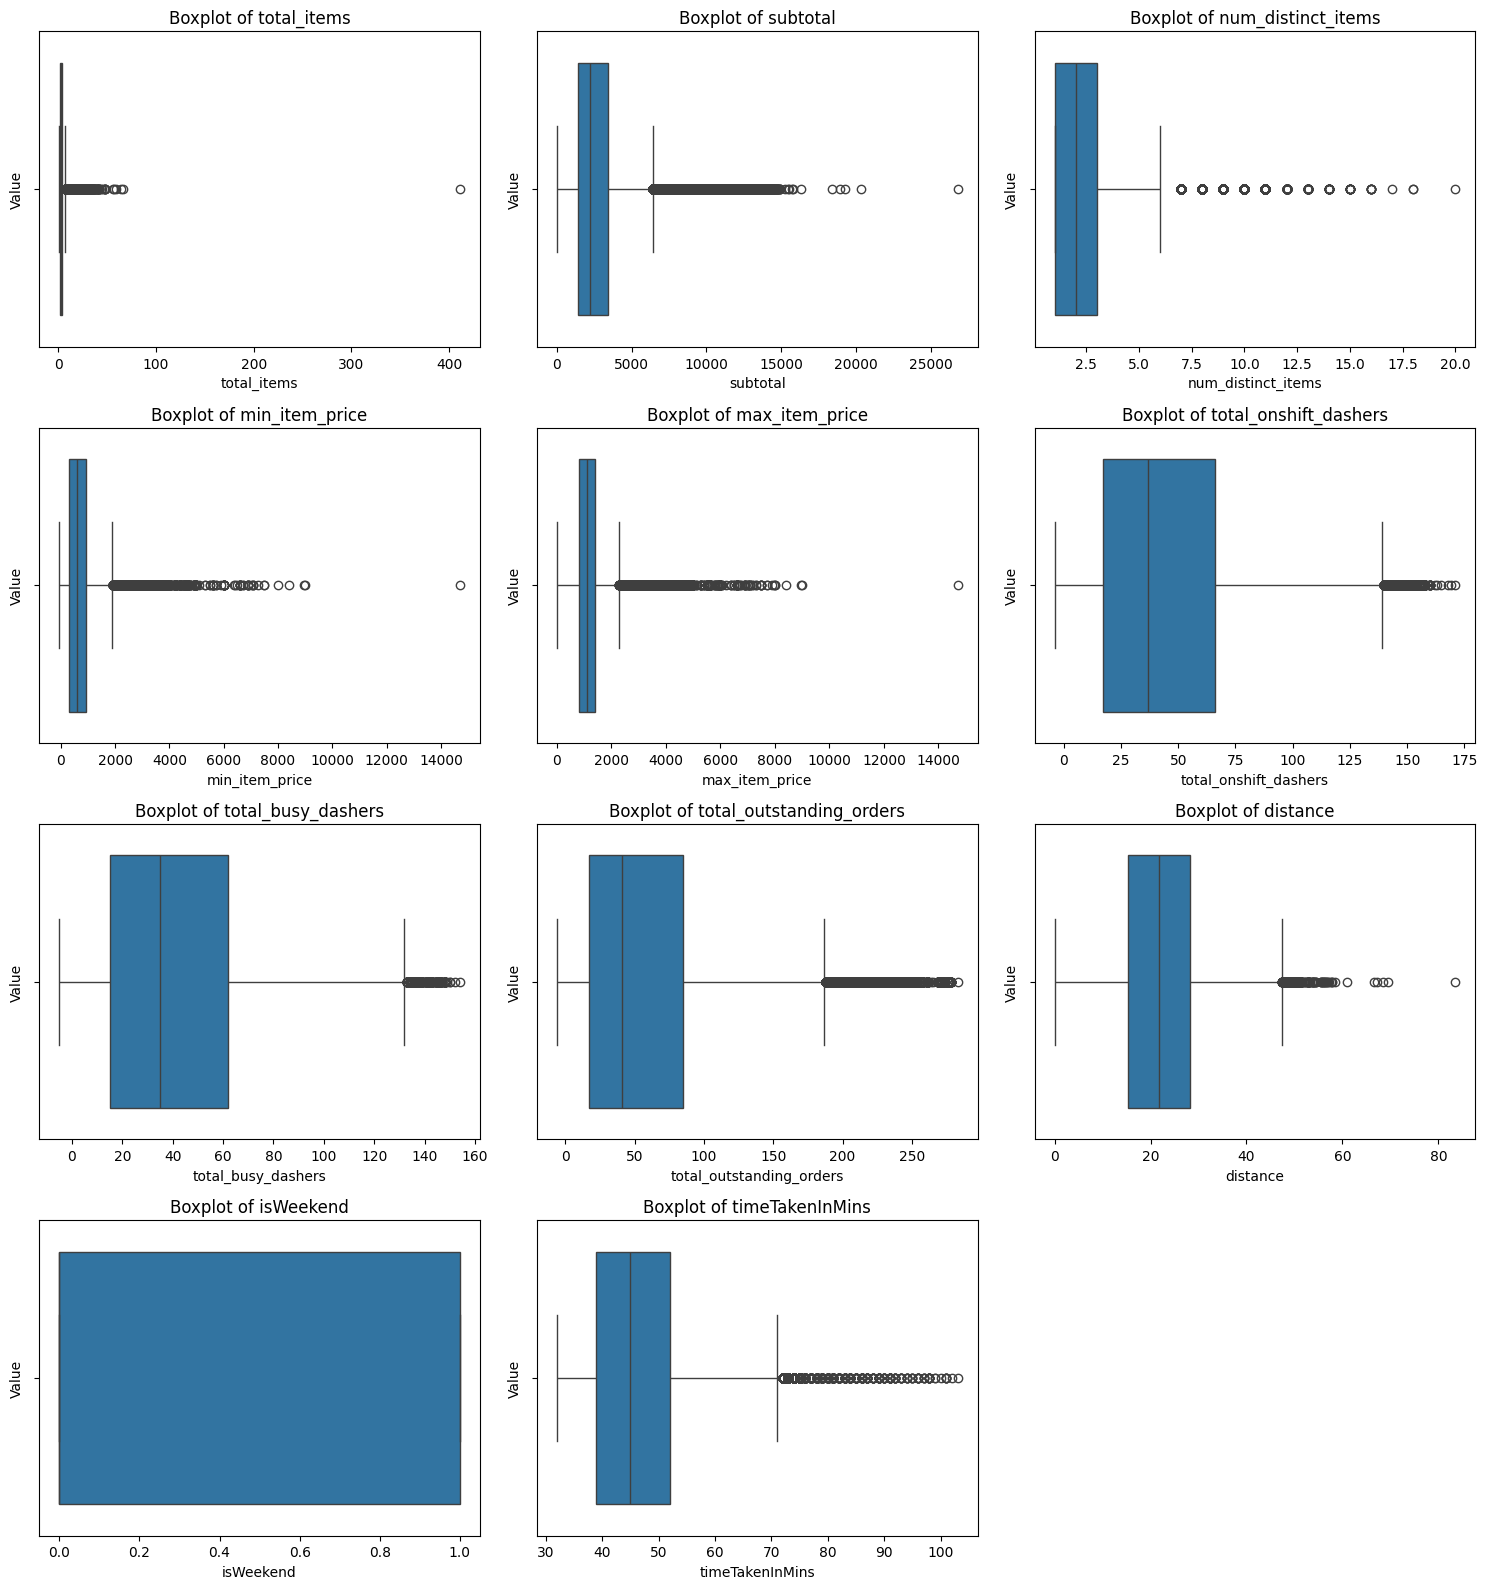

In [39]:
# plot box plots
plot_boxplots(df_train, numerical_columns)

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [161]:
# utility functions
def plot_categorical_distribution(df, cols=None, n_cols=3, figsize_per_plot=(6, 8)):
    if cols is None:
        cols = df.select_dtypes(include='object').columns.tolist()

    n_plots = len(cols)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize_per_plot[0]*n_cols, figsize_per_plot[1]*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

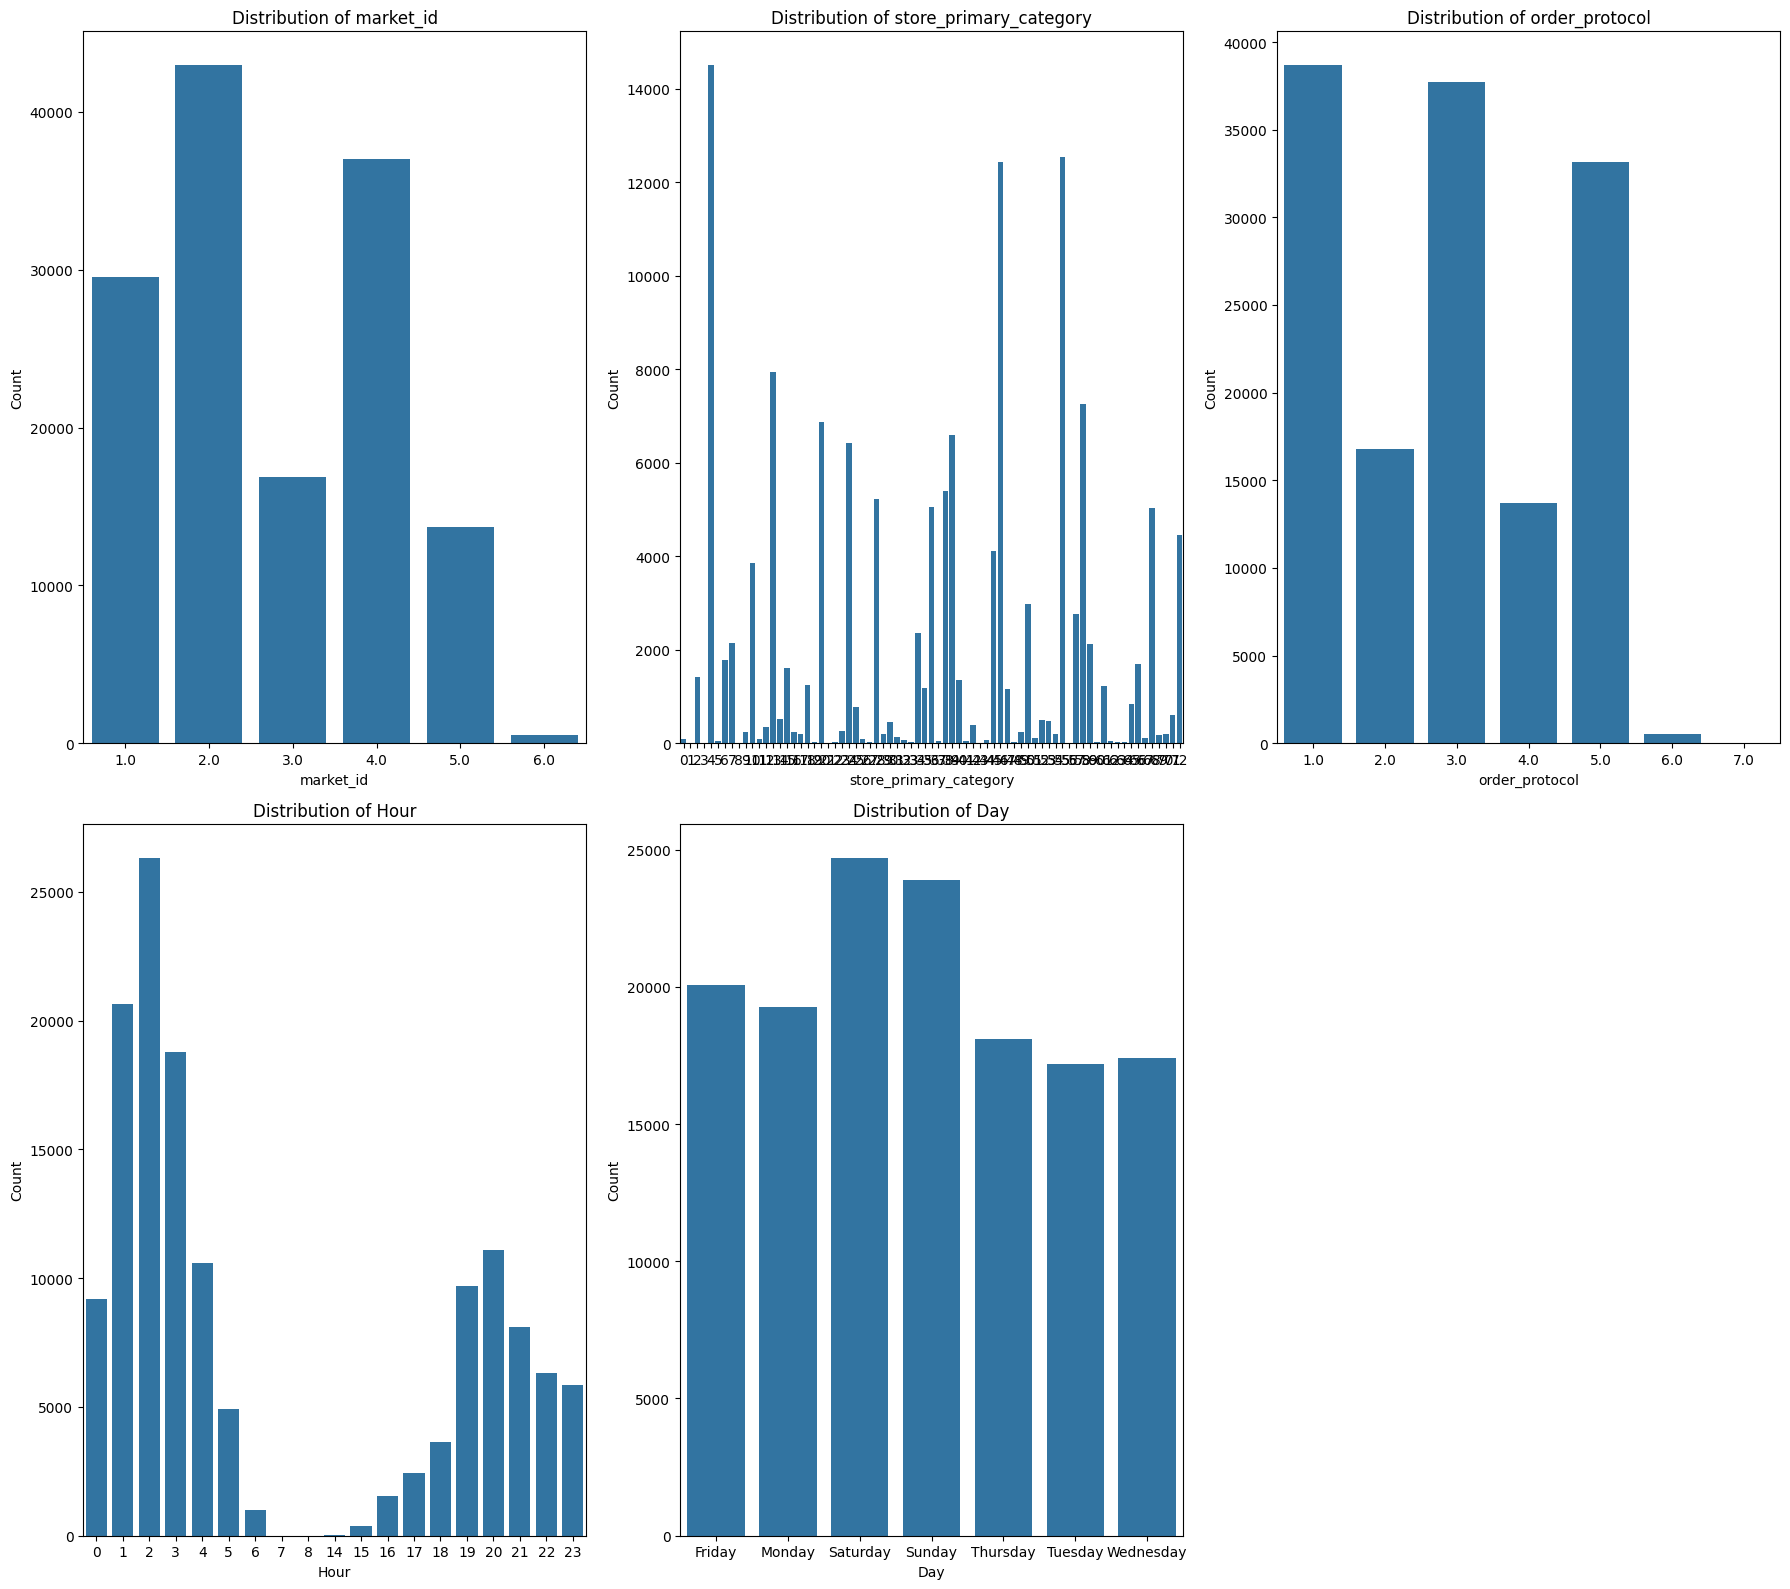

In [44]:
# Distribution of categorical columns
plot_categorical_distribution(df_train, categorical_columns)

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

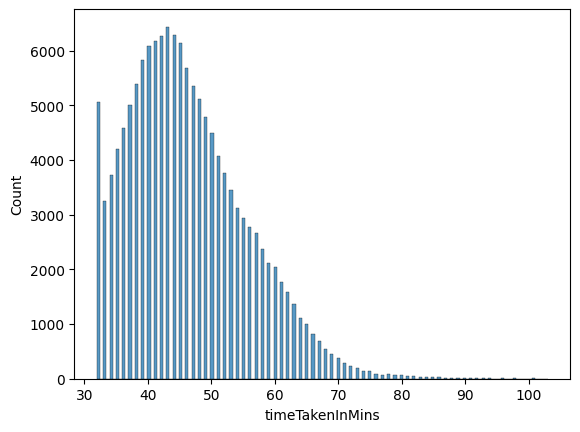

In [162]:
# Distribution of time_taken
sns.histplot(df_train['timeTakenInMins'])
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [75]:
# Scatter plot to visualise the relationship between time_taken and other features

#function to plot scatter plots of one feature against all in the dataframe.
def plot_scatter_with_target(df, target_feature, numerical_cols, cols_per_row=3, figsize=(15,10)):
    # Ensure target exists
    if target_feature not in df.columns:
        print("Target feature is not in dataframe")

    num_plot_rows = (len(numerical_cols) + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(num_plot_rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.scatterplot(data=df, x=col, y=target_feature, ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_feature)
        axes[i].set_title(f'{col} vs {target_feature}')

    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# function to plot boxplots of one feature against categorical columns
def plot_boxplots_with_target(df, target_feature, categorical_cols, cols_per_row=3, figsize=(15,10)):
    num_plot_rows = (len(categorical_cols) + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(num_plot_rows, cols_per_row, figsize=figsize)
    if num_plot_rows == 1 and cols_per_row == 1:
        axes = [axes] # Wrap the single Axes object in a list
    else:
        axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.boxplot(data=df, x=col, y=target_feature, ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_feature)
        axes[i].set_title(f'{col} vs {target_feature}')
        axes[i].tick_params(axis='x', rotation=45)

    for i in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

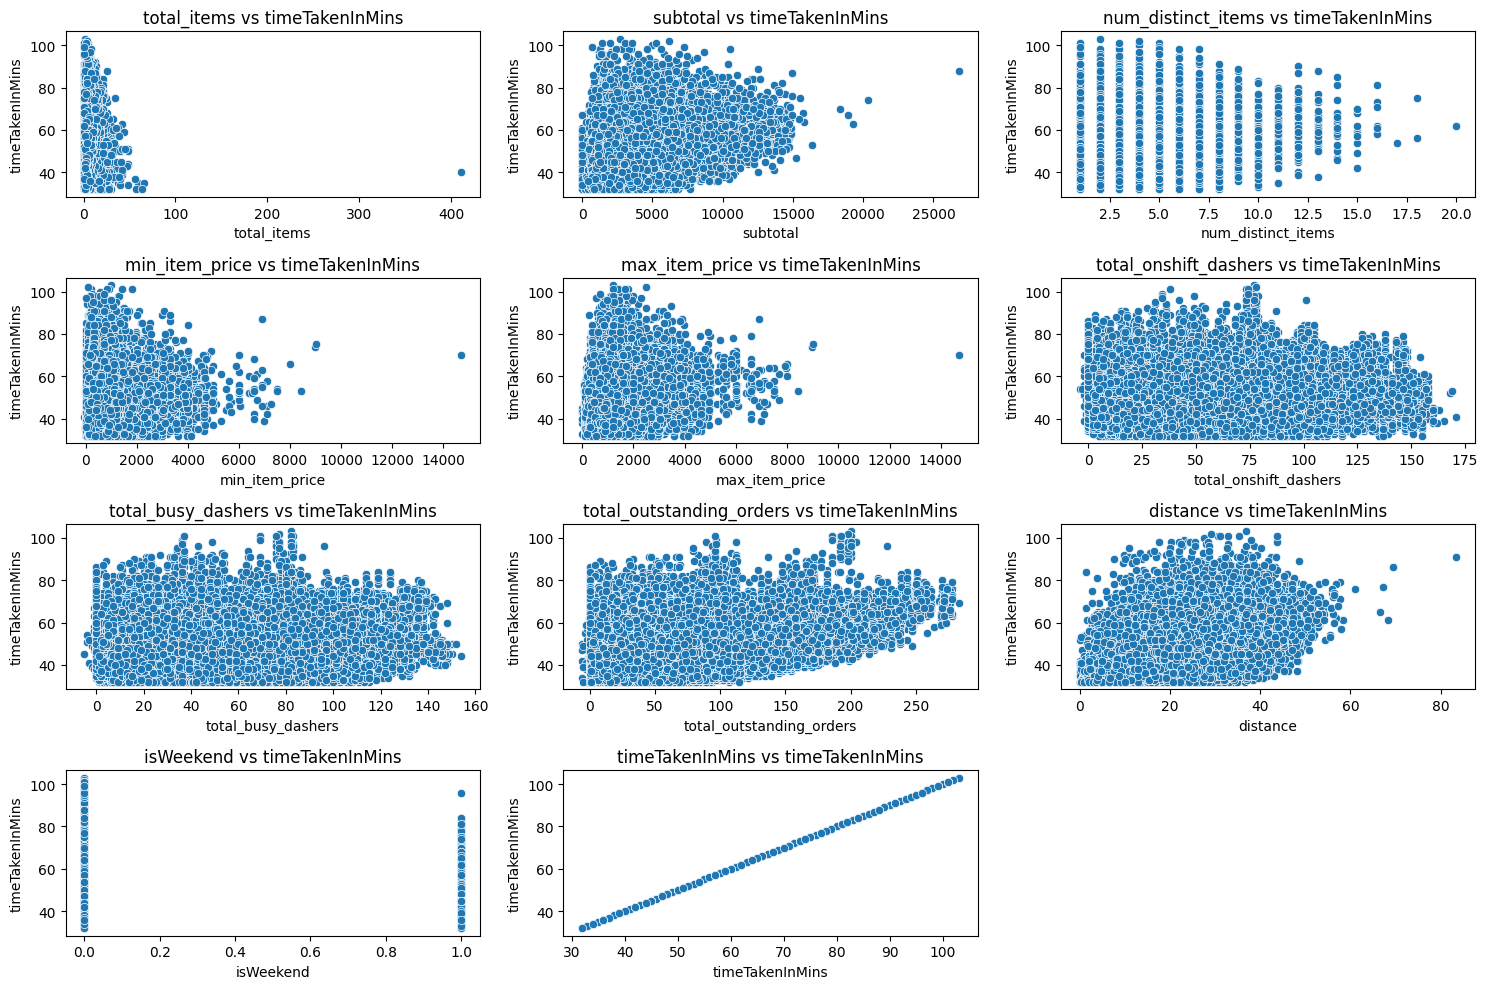

In [47]:
# plot for all numerical columns against timeTakenInMins
plot_scatter_with_target(df_train, 'timeTakenInMins', numerical_columns)

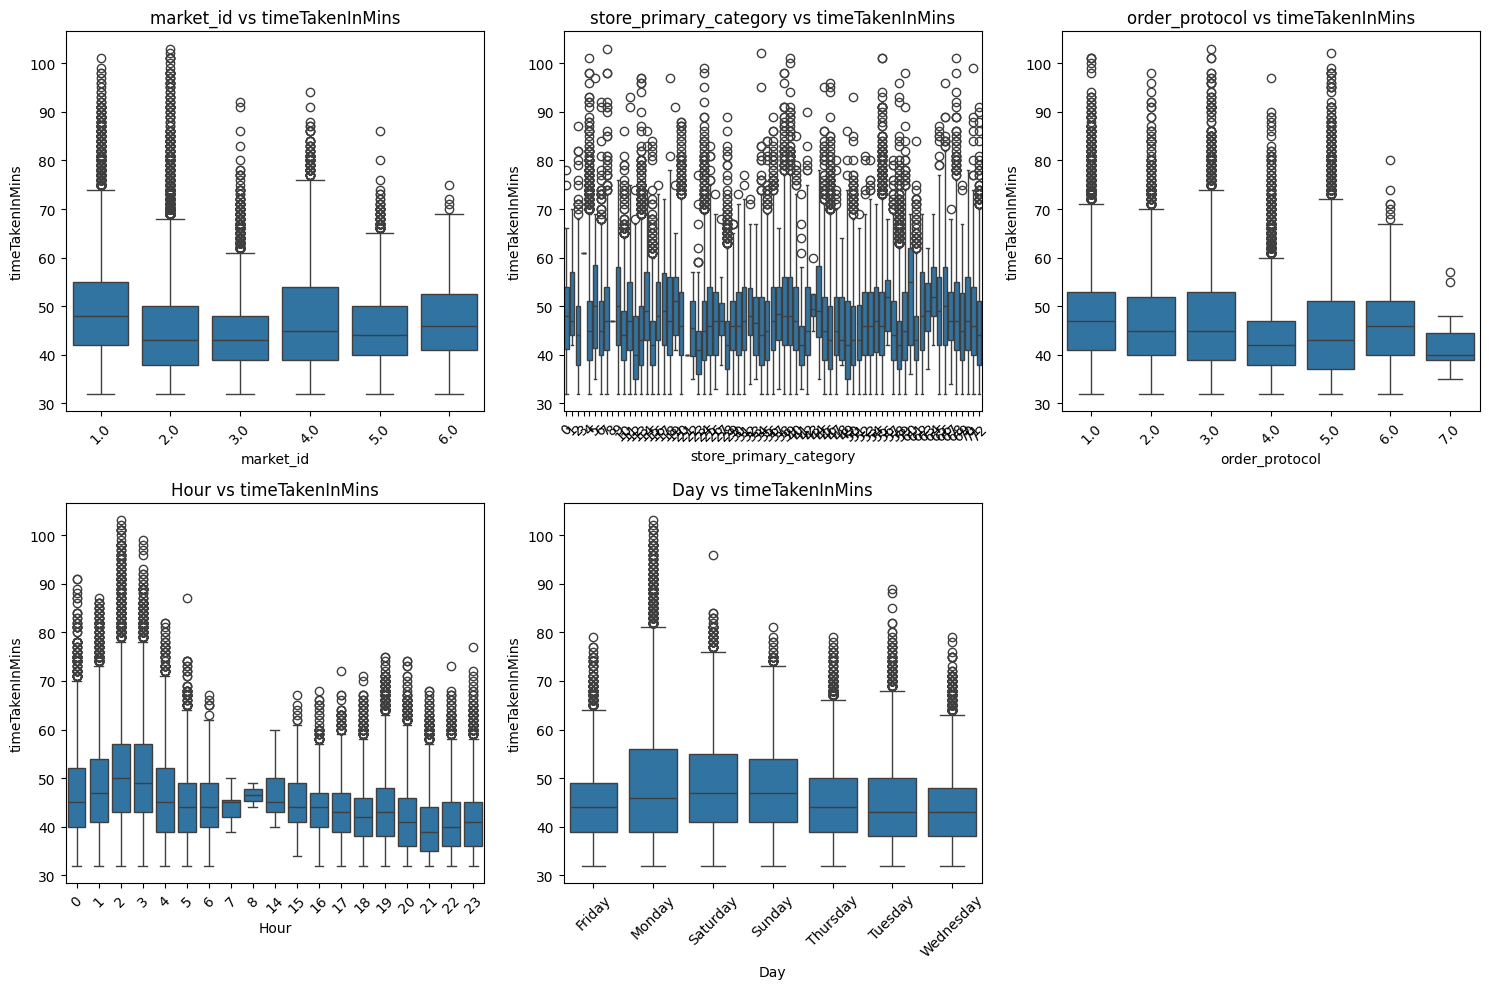

In [48]:
plot_boxplots_with_target(df_train, 'timeTakenInMins', categorical_columns)

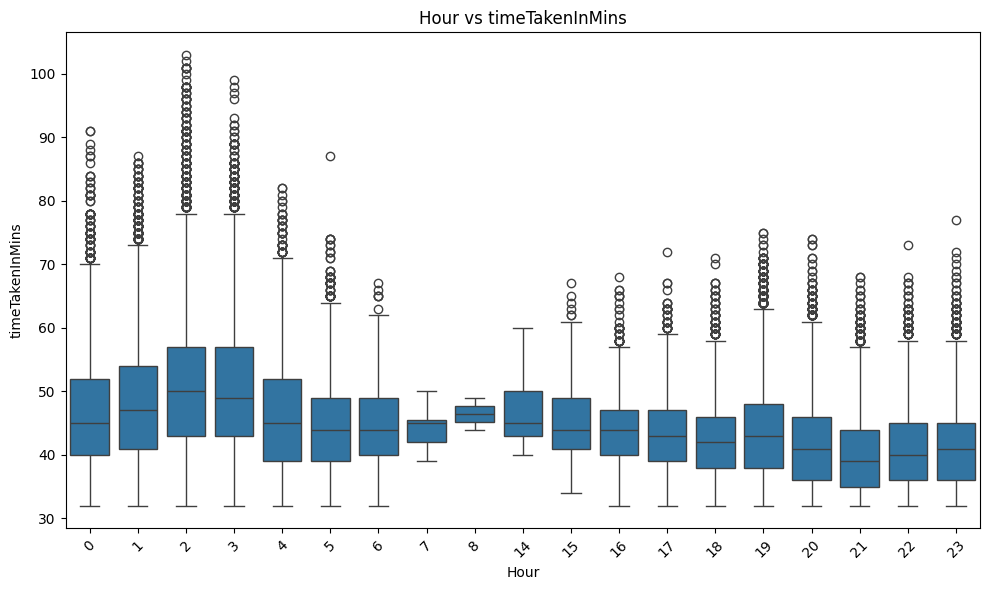

In [81]:
# Show the distribution of time_taken for different hours
plot_boxplots_with_target(df_train, 'timeTakenInMins', ['Hour'], 1, (10, 6))


In [163]:
# check if there are any records for hours 9-13
df_train[(df_train['Hour'] >= 9) & (df_train['Hour'] <= 13)]

Empty DataFrame
Columns: [market_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders, distance, Hour, Day, isWeekend, timeTakenInMins]
Index: []

Observation:
*  There are no deliveries done during the hours 9am to 1pm.

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

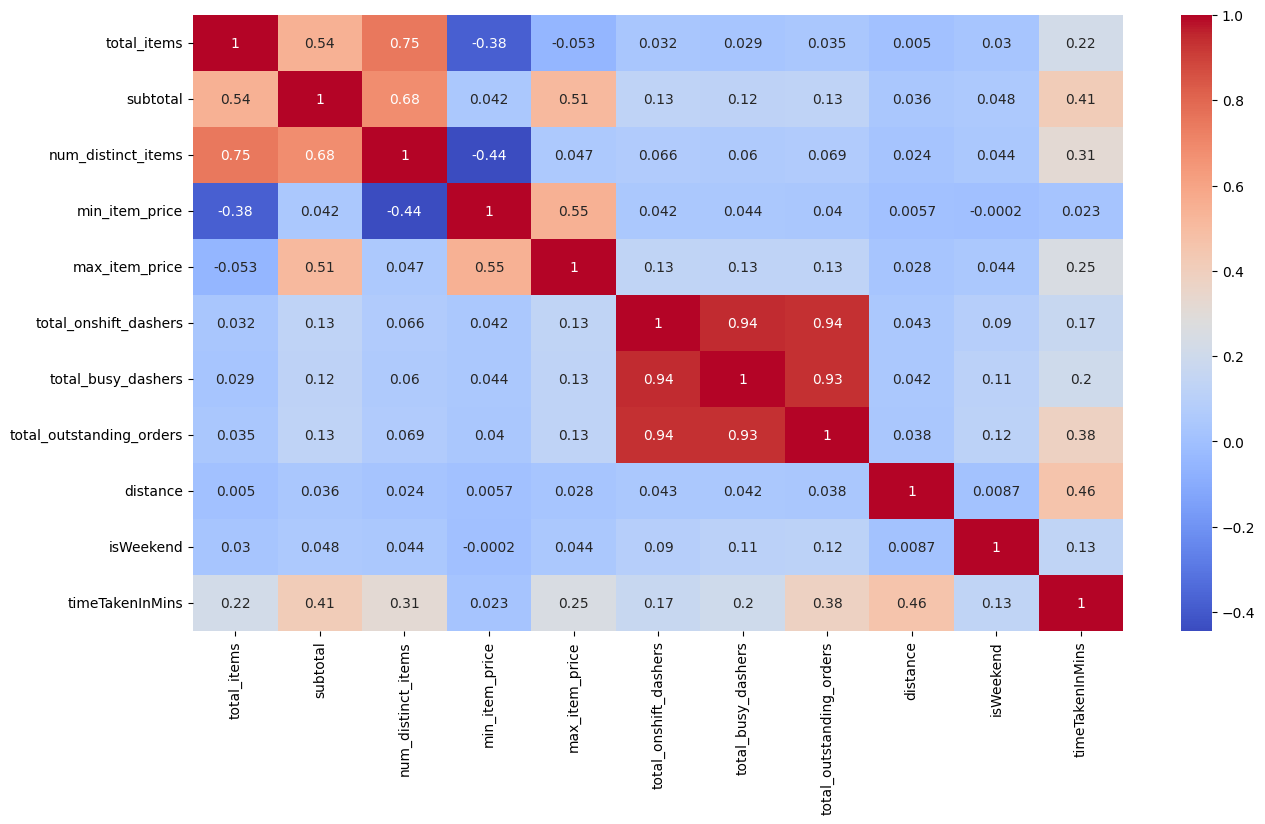

In [164]:
# Plot the heatmap of the correlation matrix
# Exclude non-numerical columns before calculating correlation
plt.figure(figsize=(15, 8)) # Increased figure size
sns.heatmap(df_train[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [318]:
# utility function
def get_n_weakly_correlated_columns(df, feature_cols, target_col, n):
    # Calculate correlation with the target
    corr = df[feature_cols].corr()[target_col].abs()

    # Pick n columns with lowest correlation
    weakest_cols = corr.nsmallest(n).index.tolist()

    return weakest_cols

In [325]:
# Drop 3-5 weakly correlated columns from training dataset
n_weak_cols = get_n_weakly_correlated_columns(df_train, numerical_columns, 'timeTakenInMins', 5)
print(n_weak_cols)

['min_item_price', 'isWeekend', 'total_onshift_dashers', 'total_busy_dashers', 'total_items']


In [326]:
X_train.drop(n_weak_cols, axis=1, inplace=True)
X_test.drop(n_weak_cols, axis=1, inplace=True)

In [327]:
X_train.head()

market_id store_primary_category order_protocol  subtotal  \
42111        3.0                      7            2.0      1350   
58452        2.0                     46            5.0      4285   
20644        4.0                     45            2.0      7880   
79735        4.0                     45            2.0      3660   
167933       1.0                      4            5.0      8575   

        num_distinct_items  max_item_price  total_outstanding_orders  \
42111                    1            1350                      19.0   
58452                    5             900                     207.0   
20644                    3            1450                     115.0   
79735                    3            1450                     173.0   
167933                   5            2625                      61.0   

        distance  Hour       Day  
42111       9.60    20    Monday  
58452      34.56     2  Saturday  
20644      34.92     3    Friday  
79735      25.76     2  Saturday  
167933     17.72     2  Thursday

In [328]:
# drop 'n_weak_cols' from df_train which consists of X_train and y_train
df_train.drop(n_weak_cols, axis=1, inplace=True)

In [329]:
df_train.head()

market_id store_primary_category order_protocol  subtotal  \
42111        3.0                      7            2.0      1350   
58452        2.0                     46            5.0      4285   
20644        4.0                     45            2.0      7880   
79735        4.0                     45            2.0      3660   
167933       1.0                      4            5.0      8575   

        num_distinct_items  max_item_price  total_outstanding_orders  \
42111                    1            1350                      19.0   
58452                    5             900                     207.0   
20644                    3            1450                     115.0   
79735                    3            1450                     173.0   
167933                   5            2625                      61.0   

        distance  Hour       Day  timeTakenInMins  
42111       9.60    20    Monday             32.0  
58452      34.56     2  Saturday             71.0  
20644      34.92     3    Friday             62.0  
79735      25.76     2  Saturday             54.0  
167933     17.72     2  Thursday             56.0

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [171]:
df_train.describe()

subtotal  num_distinct_items  max_item_price  \
count  140621.000000       140621.000000   140621.000000   
mean     2697.092604            2.673548     1160.720468   
std      1830.073210            1.624359      564.134123   
min         0.000000            1.000000        0.000000   
25%      1415.000000            1.000000      799.000000   
50%      2220.000000            2.000000     1095.000000   
75%      3407.000000            3.000000     1395.000000   
max     26800.000000           20.000000    14700.000000   

       total_outstanding_orders       distance           Hour  timeTakenInMins  
count             140621.000000  140621.000000  140621.000000    140621.000000  
mean                  58.230094      21.833790       8.473365        46.188044  
std                   52.670093       8.752255       8.676889         9.323697  
min                   -6.000000       0.000000       0.000000        32.000000  
25%                   17.000000      15.320000       2.000000        39.000000  
50%                   41.000000      21.760000       3.000000        45.000000  
75%                   85.000000      28.120000      19.000000        52.000000  
max                  283.000000      83.520000      23.000000       103.000000

Observation:
*   There are fields that have distance as zero. Check if timeTakenInMins is greater than it should be, then we can remove those rows.
*   total_outstandiing_orders is less than 0 for few fields.
*   subtotal is 0, check if these can be removed.
*   max_item_price is zero, check if these rows can be removed.

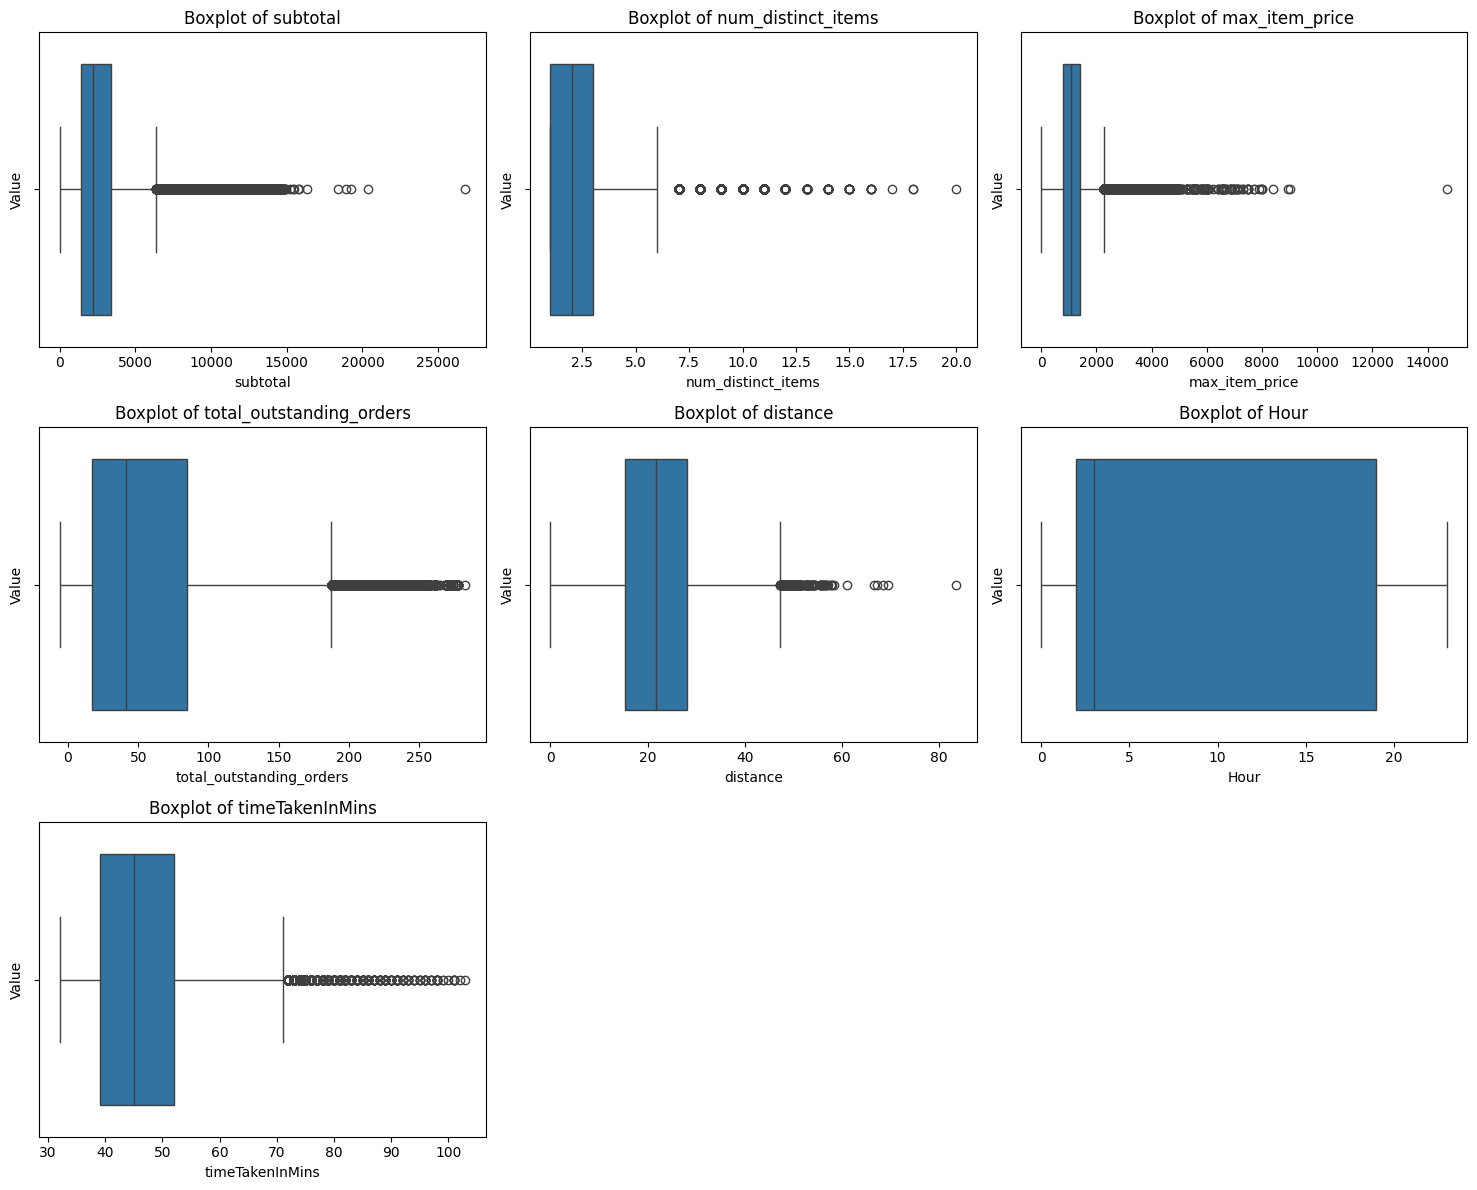

In [172]:
# Boxplot for time_taken
plot_boxplots(df_train)

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [330]:
# Handle outliers

# utility function for running any query on the given dataframe
# and returns the df that satisfy the query
def query_on_df(df, query):
  if query == "":
    return df
  return df.query(query, engine='python')

# utility function to remove rows from parent df that are present in outlier df.
# the outlier df is the result of running query_on_df().
# ensure that the indexes are not reset in between
# after this, the indexes are reset.
def remove_rows_train_set(X_train_df, y_train_df, outlier_df):
  # Create a boolean mask based on the outlier indices
  mask = X_train_df.index.isin(outlier_df.index)

  # Use the mask to filter both X_train_df and y_train_df
  X_train_df = X_train_df[~mask].reset_index(drop=True)
  y_train_df = y_train_df[~mask].reset_index(drop=True)
  return X_train_df, y_train_df

In [331]:
# handle outliers for distance, sub_total and total_outstanding_orders,
# since these have comparatively higher correlation with timeTakenInMins

# 1. check for distance having zero values
outlier_distance_zero_df = query_on_df(df_train, 'distance == 0')

In [332]:
outlier_distance_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 86435 to 50386
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 7 non-null      category
 1   store_primary_category    7 non-null      category
 2   order_protocol            7 non-null      category
 3   subtotal                  7 non-null      int64   
 4   num_distinct_items        7 non-null      int64   
 5   max_item_price            7 non-null      int64   
 6   total_outstanding_orders  7 non-null      float64 
 7   distance                  7 non-null      float64 
 8   Hour                      7 non-null      int32   
 9   Day                       7 non-null      category
 10  timeTakenInMins           7 non-null      float64 
dtypes: category(4), float64(3), int32(1), int64(3)
memory usage: 4.0 KB


In [287]:
outlier_distance_zero_df

market_id store_primary_category order_protocol  subtotal  \
86435        2.0                     47            3.0      3490   
64083        1.0                     50            2.0      1600   
31782        4.0                     58            3.0      3390   
140320       1.0                     71            1.0      7200   
159736       4.0                     68            3.0      6875   
51110        4.0                     53            1.0      3082   
50386        4.0                     53            1.0      2187   

        num_distinct_items  max_item_price  total_outstanding_orders  \
86435                    2            1995                      16.0   
64083                    3             800                      10.0   
31782                    4             830                      12.0   
140320                   3            1400                      38.0   
159736                   7            1181                     115.0   
51110                    3             895                      24.0   
50386                    2             797                      24.0   

        distance  Hour        Day  timeTakenInMins  
86435        0.0     0   Thursday             32.0  
64083        0.0    23   Thursday             35.0  
31782        0.0    18     Friday             36.0  
140320       0.0     4    Tuesday             40.0  
159736       0.0    19     Monday             52.0  
51110        0.0    23     Monday             37.0  
50386        0.0    22  Wednesday             35.0

In [333]:
# run the query on X_train to remove them from X_train and y_train
outlier_distance_0_X_train = query_on_df(X_train, 'distance == 0')

X_train, y_train = remove_rows_train_set(X_train, y_train, outlier_distance_0_X_train)

In [334]:
print(X_train.shape, y_train.shape)

(140614, 10) (140614,)


In [335]:
X_train.head()

market_id store_primary_category order_protocol  subtotal  \
0       3.0                      7            2.0      1350   
1       2.0                     46            5.0      4285   
2       4.0                     45            2.0      7880   
3       4.0                     45            2.0      3660   
4       1.0                      4            5.0      8575   

   num_distinct_items  max_item_price  total_outstanding_orders  distance  \
0                   1            1350                      19.0      9.60   
1                   5             900                     207.0     34.56   
2                   3            1450                     115.0     34.92   
3                   3            1450                     173.0     25.76   
4                   5            2625                      61.0     17.72   

   Hour       Day  
0    20    Monday  
1     2  Saturday  
2     3    Friday  
3     2  Saturday  
4     2  Thursday

In [336]:
y_train.head()

0    32.0
1    71.0
2    62.0
3    54.0
4    56.0
Name: timeTakenInMins, dtype: float64

In [338]:
# 2. check for total_outstanding_orders that are in negative
total_outstanding_orders_negative_X_train = query_on_df(X_train, 'total_outstanding_orders < 0')

In [339]:
total_outstanding_orders_negative_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 5900 to 138832
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 34 non-null     category
 1   store_primary_category    34 non-null     category
 2   order_protocol            34 non-null     category
 3   subtotal                  34 non-null     int64   
 4   num_distinct_items        34 non-null     int64   
 5   max_item_price            34 non-null     int64   
 6   total_outstanding_orders  34 non-null     float64 
 7   distance                  34 non-null     float64 
 8   Hour                      34 non-null     int32   
 9   Day                       34 non-null     category
dtypes: category(4), float64(2), int32(1), int64(3)
memory usage: 5.4 KB


In [340]:
# remove these rows as well
X_train, y_train = remove_rows_train_set(X_train, y_train, total_outstanding_orders_negative_X_train)

In [341]:
# 3. subtotal == 0
subtotal_zero_X_train = query_on_df(X_train, 'subtotal == 0')

In [342]:
subtotal_zero_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 67 to 140469
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 135 non-null    category
 1   store_primary_category    135 non-null    category
 2   order_protocol            135 non-null    category
 3   subtotal                  135 non-null    int64   
 4   num_distinct_items        135 non-null    int64   
 5   max_item_price            135 non-null    int64   
 6   total_outstanding_orders  135 non-null    float64 
 7   distance                  135 non-null    float64 
 8   Hour                      135 non-null    int32   
 9   Day                       135 non-null    category
dtypes: category(4), float64(2), int32(1), int64(3)
memory usage: 10.9 KB


In [343]:
subtotal_zero_X_train.describe()

subtotal  num_distinct_items  max_item_price  total_outstanding_orders  \
count     135.0          135.000000      135.000000                135.000000   
mean        0.0            2.548148     1167.622222                 56.466667   
std         0.0            1.534278      545.885422                 50.373204   
min         0.0            1.000000      200.000000                  0.000000   
25%         0.0            2.000000      829.500000                 15.000000   
50%         0.0            2.000000     1099.000000                 42.000000   
75%         0.0            3.000000     1395.000000                 89.000000   
max         0.0            9.000000     2990.000000                232.000000   

         distance        Hour  
count  135.000000  135.000000  
mean    22.527704    8.474074  
std      8.353062    8.661831  
min      0.160000    0.000000  
25%     16.140000    2.000000  
50%     22.920000    3.000000  
75%     28.080000   19.000000  
max     50.760000   23.000000

In [344]:
# drop these rows
X_train, y_train = remove_rows_train_set(X_train, y_train, subtotal_zero_X_train)

In [345]:
# 4. max_item_price == 0
max_item_price_zero_X_train = query_on_df(X_train, 'max_item_price == 0')

In [346]:
max_item_price_zero_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 822 to 119610
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 5 non-null      category
 1   store_primary_category    5 non-null      category
 2   order_protocol            5 non-null      category
 3   subtotal                  5 non-null      int64   
 4   num_distinct_items        5 non-null      int64   
 5   max_item_price            5 non-null      int64   
 6   total_outstanding_orders  5 non-null      float64 
 7   distance                  5 non-null      float64 
 8   Hour                      5 non-null      int32   
 9   Day                       5 non-null      category
dtypes: category(4), float64(2), int32(1), int64(3)
memory usage: 3.8 KB


In [347]:
max_item_price_zero_X_train

market_id store_primary_category order_protocol  subtotal  \
822          1.0                     46            1.0       560   
29755        1.0                     58            1.0      1090   
42777        1.0                     25            5.0       595   
94705        5.0                     55            3.0      2418   
119610       1.0                     46            1.0       575   

        num_distinct_items  max_item_price  total_outstanding_orders  \
822                      1               0                      29.0   
29755                    2               0                      31.0   
42777                    1               0                      75.0   
94705                    1               0                      36.0   
119610                   1               0                      15.0   

        distance  Hour        Day  
822        20.76    19  Wednesday  
29755      15.08    19  Wednesday  
42777      21.92     2     Friday  
94705      19.80     2    Tuesday  
119610     15.04    18     Friday

In [348]:
# remove these rows.
X_train, y_train = remove_rows_train_set(X_train, y_train, max_item_price_zero_X_train)

In [349]:
# utility function for plotting dataframes
def plot_dataframes(parentdf, df_1, df_2, xcol, ycol, df_1_label, df_2_label):
  plt.figure(figsize=(10, 6))

  # plotting for parent df
  sns.lineplot(x=xcol, y=ycol, data=parentdf, label='All rows')

  # plotting for df_1
  sns.lineplot(x=xcol, y=ycol, data=df_1, label=df_1_label)

  # plotting for df_2
  sns.lineplot(x=xcol, y=ycol, data=df_2, label=df_2_label)

  # Adding labels and title
  plt.title(f'Comparison of {ycol} [All vs {df_1_label} vs {df_2_label}] against {xcol}')
  plt.xlabel(xcol)
  plt.ylabel(ycol)
  plt.legend()

  # Show plot
  plt.show()

In [350]:
X_train.describe()

subtotal  num_distinct_items  max_item_price  \
count  140440.000000       140440.000000   140440.000000   
mean     2699.694012            2.673754     1160.756914   
std      1829.093275            1.624459      564.108752   
min        95.000000            1.000000       52.000000   
25%      1420.000000            1.000000      799.000000   
50%      2223.000000            2.000000     1095.000000   
75%      3410.000000            3.000000     1395.000000   
max     26800.000000           20.000000    14700.000000   

       total_outstanding_orders       distance           Hour  
count             140440.000000  140440.000000  140440.000000  
mean                  58.248476      21.833937       8.472031  
std                   52.671381       8.751283       8.676573  
min                    0.000000       0.080000       0.000000  
25%                   17.000000      15.320000       2.000000  
50%                   41.000000      21.760000       3.000000  
75%                   85.000000      28.120000      19.000000  
max                  283.000000      83.520000      23.000000

In [351]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140440 entries, 0 to 140439
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140440 non-null  category
 1   store_primary_category    140440 non-null  category
 2   order_protocol            140440 non-null  category
 3   subtotal                  140440 non-null  int64   
 4   num_distinct_items        140440 non-null  int64   
 5   max_item_price            140440 non-null  int64   
 6   total_outstanding_orders  140440 non-null  float64 
 7   distance                  140440 non-null  float64 
 8   Hour                      140440 non-null  int32   
 9   Day                       140440 non-null  category
dtypes: category(4), float64(2), int32(1), int64(3)
memory usage: 6.4 MB


In [352]:
# print shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140440, 10)
y_train shape: (140440,)
X_test shape: (35156, 10)
y_test shape: (35156,)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [353]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [354]:
# Apply scaling to the numerical columns
def apply_scaling(df, scaler, fit=True):
    df_scaled = df.copy() # take a copy, for returning
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    if fit:
      # for training data
      df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    else:
      # for test data
      df_scaled[numerical_cols] = scaler.transform(df[numerical_cols])

    return df_scaled

In [355]:
scaler = MinMaxScaler()

X_train = apply_scaling(X_train, scaler, fit=True)

In [356]:
X_train.describe()

subtotal  num_distinct_items  max_item_price  \
count  140440.000000       140440.000000   140440.000000   
mean        0.097536            0.088092        0.075693   
std         0.068493            0.085498        0.038511   
min         0.000000            0.000000        0.000000   
25%         0.049616            0.000000        0.050997   
50%         0.079685            0.052632        0.071204   
75%         0.124134            0.105263        0.091685   
max         1.000000            1.000000        1.000000   

       total_outstanding_orders       distance           Hour  
count             140440.000000  140440.000000  140440.000000  
mean                   0.205825       0.260714       8.472031  
std                    0.186118       0.104881       8.676573  
min                    0.000000       0.000000       0.000000  
25%                    0.060071       0.182646       2.000000  
50%                    0.144876       0.259827       3.000000  
75%                    0.300353       0.336050      19.000000  
max                    1.000000       1.000000      23.000000

In [357]:
X_train.head()

market_id store_primary_category order_protocol  subtotal  \
0       3.0                      7            2.0  0.046995   
1       2.0                     46            5.0  0.156899   
2       4.0                     45            2.0  0.291518   
3       4.0                     45            2.0  0.133496   
4       1.0                      4            5.0  0.317544   

   num_distinct_items  max_item_price  total_outstanding_orders  distance  \
0            0.000000        0.088613                  0.067138  0.114094   
1            0.210526        0.057892                  0.731449  0.413231   
2            0.105263        0.095440                  0.406360  0.417546   
3            0.105263        0.095440                  0.611307  0.307766   
4            0.210526        0.175655                  0.215548  0.211409   

   Hour       Day  
0    20    Monday  
1     2  Saturday  
2     3    Friday  
3     2  Saturday  
4     2  Thursday

In [358]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140440 entries, 0 to 140439
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140440 non-null  category
 1   store_primary_category    140440 non-null  category
 2   order_protocol            140440 non-null  category
 3   subtotal                  140440 non-null  float64 
 4   num_distinct_items        140440 non-null  float64 
 5   max_item_price            140440 non-null  float64 
 6   total_outstanding_orders  140440 non-null  float64 
 7   distance                  140440 non-null  float64 
 8   Hour                      140440 non-null  int32   
 9   Day                       140440 non-null  category
dtypes: category(4), float64(5), int32(1)
memory usage: 6.4 MB


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [364]:
# build first model by picking only distance
X_train_sm = sm.add_constant(X_train['distance'])

In [365]:
# Create/Initialise the model

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const       35.524896
distance    40.915191
dtype: float64

In [ ]:
# Train the model using the training data
lr_model = lr.fit()

lr_model.params

In [366]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 3.773e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:15:47   Log-Likelihood:            -4.9612e+05
No. Observations:              140440   AIC:                         9.923e+05
Df Residuals:                  140438   BIC:                         9.923e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5249      0.059    600.158      0.000      35.409      35.641
distance      40.9152      0.211    194.246      0.000      40.502      41.328
==============================================================================
Omnibus:                    16964.048   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26718.932
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                       4.256   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
# add Hour and build the model and print the summary

X_train_sm = sm.add_constant(X_train[['distance', 'Hour']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                 3.354e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:30:29   Log-Likelihood:            -4.8542e+05
No. Observations:              140440   AIC:                         9.708e+05
Df Residuals:                  140437   BIC:                         9.709e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7428      0.059    659.017      0.000      38.628      38.858
distance      40.2346      0.195    206.089      0.000      39.852      40.617
Hour          -0.3589      0.002   -152.075      0.000      -0.364      -0.354
==============================================================================
Omnibus:                    14269.058   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24548.165
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                       4.464   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [373]:
# add subtotal and build again
X_train_sm = sm.add_constant(X_train[['distance', 'Hour', 'subtotal']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 3.663e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:32:01   Log-Likelihood:            -4.7224e+05
No. Observations:              140440   AIC:                         9.445e+05
Df Residuals:                  140436   BIC:                         9.445e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7984      0.061    555.030      0.000      33.679      33.918
distance      39.2577      0.178    220.750      0.000      38.909      39.606
Hour          -0.2887      0.002   -131.940      0.000      -0.293      -0.284
subtotal      47.2048      0.277    170.258      0.000      46.661      47.748
==============================================================================
Omnibus:                    17174.203   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38070.848
Skew:                           0.744   Prob(JB):                         0.00
Kurtosis:                       5.071   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
# add total_outstanding orders
X_train_sm = sm.add_constant(X_train[['distance', 'Hour', 'subtotal', 'total_outstanding_orders']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 3.468e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:34:13   Log-Likelihood:            -4.6459e+05
No. Observations:              140440   AIC:                         9.292e+05
Df Residuals:                  140435   BIC:                         9.292e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       30.6833      0.063    489.733      0.000      30.561      30.806
distance                    38.6271      0.168    229.268      0.000      38.297      38.957
Hour                        -0.1913      0.002    -86.604      0.000      -0.196      -0.187
subtotal                    44.9948      0.263    171.001      0.000      44.479      45.511
total_outstanding_orders    12.9725      0.102    127.161      0.000      12.773      13.172
==============================================================================
Omnibus:                    10421.276   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20040.147
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       4.525   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [375]:
# add max_item_price
X_train_sm = sm.add_constant(X_train[['distance', 'Hour', 'subtotal', 'total_outstanding_orders', 'max_item_price']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 2.775e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:36:08   Log-Likelihood:            -4.6458e+05
No. Observations:              140440   AIC:                         9.292e+05
Df Residuals:                  140434   BIC:                         9.292e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       30.5780      0.068    449.199      0.000      30.445      30.711
distance                    38.6215      0.168    229.238      0.000      38.291      38.952
Hour                        -0.1905      0.002    -85.932      0.000      -0.195      -0.186
subtotal                    44.4072      0.302    146.991      0.000      43.815      44.999
total_outstanding_orders    12.9569      0.102    126.920      0.000      12.757      13.157
max_item_price               2.1255      0.537      3.958      0.000       1.073       3.178
==============================================================================
Omnibus:                    10414.205   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20002.513
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       4.523   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation:

*   R-squared has not changed by adding max_item_price. Since we already have 'subtotal', it is co-related with it.

In [376]:
# add market_id
X_train_sm = sm.add_constant(X_train[['distance', 'Hour', 'subtotal', 'total_outstanding_orders', 'market_id']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 2.888e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:38:23   Log-Likelihood:            -4.6318e+05
No. Observations:              140440   AIC:                         9.264e+05
Df Residuals:                  140434   BIC:                         9.264e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.4896      0.071    459.913      0.000      32.351      32.628
distance                    38.7899      0.167    232.522      0.000      38.463      39.117
Hour                        -0.1891      0.002    -86.463      0.000      -0.193      -0.185
subtotal                    44.8779      0.261    172.274      0.000      44.367      45.389
total_outstanding_orders    13.3456      0.101    131.825      0.000      13.147      13.544
market_id                   -0.7044      0.013    -53.423      0.000      -0.730      -0.679
==============================================================================
Omnibus:                     8125.925   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15462.154
Skew:                           0.429   Prob(JB):                         0.00
Kurtosis:                       4.381   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
# add store_primary_category
X_train_sm = sm.add_constant(X_train[['distance', 'Hour', 'subtotal', 'total_outstanding_orders', 'market_id', 'store_primary_category']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 2.408e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:39:37   Log-Likelihood:            -4.6316e+05
No. Observations:              140440   AIC:                         9.263e+05
Df Residuals:                  140433   BIC:                         9.264e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.6501      0.076    431.128      0.000      32.502      32.799
distance                    38.7854      0.167    232.520      0.000      38.458      39.112
Hour                        -0.1891      0.002    -86.473      0.000      -0.193      -0.185
subtotal                    44.9257      0.261    172.394      0.000      44.415      45.436
total_outstanding_orders    13.3879      0.101    131.926      0.000      13.189      13.587
market_id                   -0.7022      0.013    -53.248      0.000      -0.728      -0.676
store_primary_category      -0.0050      0.001     -5.876      0.000      -0.007      -0.003
==============================================================================
Omnibus:                     8163.177   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15532.844
Skew:                           0.430   Prob(JB):                         0.00
Kurtosis:                       4.383   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation:

*   Adding 'store_primary_category' has not changed the r-squared much. We can drop it

In [381]:
# add order_protocol
X_train_sm = sm.add_constant(X_train[['distance', 'Hour', 'subtotal', 'total_outstanding_orders', 'market_id', 'order_protocol']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 2.644e+04
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:40:59   Log-Likelihood:            -4.5975e+05
No. Observations:              140440   AIC:                         9.195e+05
Df Residuals:                  140433   BIC:                         9.196e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.1709      0.076    462.710      0.000      35.022      35.320
distance                    38.6073      0.163    237.116      0.000      38.288      38.926
Hour                        -0.1787      0.002    -83.574      0.000      -0.183      -0.174
subtotal                    43.5404      0.255    170.927      0.000      43.041      44.040
total_outstanding_orders    14.6706      0.100    146.622      0.000      14.474      14.867
market_id                   -0.7318      0.013    -56.857      0.000      -0.757      -0.707
order_protocol              -0.9576      0.011    -83.765      0.000      -0.980      -0.935
==============================================================================
Omnibus:                    10268.286   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19745.378
Skew:                           0.518   Prob(JB):                         0.00
Kurtosis:                       4.517   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [467]:
# add Day
X_train_day_encoded = pd.get_dummies(X_train['Day'], drop_first=True)
X_train_sm = pd.concat([X_train_day_encoded, X_train[['distance', 'Hour', 'subtotal', 'total_outstanding_orders']]], axis=1)
X_train_sm.columns
X_train_sm = X_train_sm.astype(float)


In [468]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140440 entries, 0 to 140439
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Monday                    140440 non-null  float64
 1   Saturday                  140440 non-null  float64
 2   Sunday                    140440 non-null  float64
 3   Thursday                  140440 non-null  float64
 4   Tuesday                   140440 non-null  float64
 5   Wednesday                 140440 non-null  float64
 6   distance                  140440 non-null  float64
 7   Hour                      140440 non-null  float64
 8   subtotal                  140440 non-null  float64
 9   total_outstanding_orders  140440 non-null  float64
dtypes: float64(10)
memory usage: 10.7 MB


In [469]:
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()
#X_train_sm.info()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 1.536e+04
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:04:29   Log-Likelihood:            -4.6095e+05
No. Observations:              140440   AIC:                         9.219e+05
Df Residuals:                  140429   BIC:                         9.220e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       29.3820      0.074    395.612      0.000      29.236      29.528
Monday                       3.9165      0.065     60.192      0.000       3.789       4.044
Saturday                     2.9036      0.062     47.190      0.000       2.783       3.024
Sunday                       2.5004      0.062     40.466      0.000       2.379       2.622
Thursday                     0.5713      0.066      8.642      0.000       0.442       0.701
Tuesday                      0.6386      0.067      9.515      0.000       0.507       0.770
Wednesday                   -0.3020      0.067     -4.517      0.000      -0.433      -0.171
distance                    38.6061      0.164    235.144      0.000      38.284      38.928
Hour                        -0.1953      0.002    -90.555      0.000      -0.199      -0.191
subtotal                    44.2469      0.257    172.388      0.000      43.744      44.750
total_outstanding_orders    12.1371      0.101    120.600      0.000      11.940      12.334
==============================================================================
Omnibus:                     6551.640   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12136.491
Skew:                           0.364   Prob(JB):                         0.00
Kurtosis:                       4.243   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [382]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [384]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
0                     const  19.87
4  total_outstanding_orders   1.19
2                      Hour   1.18
3                  subtotal   1.05
6            order_protocol   1.03
5                 market_id   1.01
1                  distance   1.00

Observation:
*  It has low p-value and VIF is also low. Lets keep these and train the model.

Action:
*   Let's take all columns and build the model
*   And check if we can remove one at a time, based on VIF

In [387]:
X_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'subtotal',
       'num_distinct_items', 'max_item_price', 'total_outstanding_orders',
       'distance', 'Hour', 'Day'],
      dtype='object')

In [479]:
X_train_sm = sm.add_constant(X_train[['market_id', 'store_primary_category', 'order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'Hour']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:14:03   Log-Likelihood:            -4.5915e+05
No. Observations:              140440   AIC:                         9.183e+05
Df Residuals:                  140430   BIC:                         9.184e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       34.6482      0.086    401.422      0.000      34.479      34.817
market_id                   -0.7416      0.013    -57.825      0.000      -0.767      -0.716
store_primary_category       0.0020      0.001      2.464      0.014       0.000       0.004
order_protocol              -0.9537      0.011    -83.219      0.000      -0.976      -0.931
subtotal                    32.0857      0.450     71.263      0.000      31.203      32.968
num_distinct_items          10.7507      0.310     34.692      0.000      10.143      11.358
max_item_price               8.1482      0.592     13.775      0.000       6.989       9.308
total_outstanding_orders    14.6837      0.100    146.937      0.000      14.488      14.880
distance                    38.5915      0.162    238.031      0.000      38.274      38.909
Hour                        -0.1763      0.002    -82.471      0.000      -0.180      -0.172
==============================================================================
Omnibus:                    10400.086   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20538.034
Skew:                           0.515   Prob(JB):                         0.00
Kurtosis:                       4.565   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [480]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
0                     const  25.84
4                  subtotal   3.30
5        num_distinct_items   2.44
6            max_item_price   1.80
7  total_outstanding_orders   1.20
9                      Hour   1.19
3            order_protocol   1.04
2    store_primary_category   1.02
1                 market_id   1.01
8                  distance   1.00

Observation:

Let's use this model to make predictions

In [481]:
# store a final model
lr_model_final = lr_model

In [482]:
# Make predictions
y_train_pred = lr_model.predict(X_train_sm)

In [483]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4.957252701963181
Mean Squared Error: 40.48126516474372
Root Mean Squared Error: 6.3624889127403375
R-squared: 0.5344512993349354


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [397]:
# import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [470]:
# encode only Day
X_train_encoded = pd.get_dummies(X_train['Day'], drop_first=True)

# X_test_encoded = pd.get_dummies(X_test['Day'], drop_first=True)

# Align test set columns with training set
# X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [471]:
X_train_encoded.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0    True     False   False     False    False      False
1   False      True   False     False    False      False
2   False     False   False     False    False      False
3   False      True   False     False    False      False
4   False     False   False      True    False      False

In [472]:
# concat the columns with X_train
X_train_encoded = pd.concat([X_train_encoded, X_train[['market_id', 'store_primary_category', 'order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'Hour']]], axis=1)

In [473]:
X_train_encoded.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday market_id  \
0    True     False   False     False    False      False       3.0   
1   False      True   False     False    False      False       2.0   
2   False     False   False     False    False      False       4.0   
3   False      True   False     False    False      False       4.0   
4   False     False   False      True    False      False       1.0   

  store_primary_category order_protocol  subtotal  num_distinct_items  \
0                      7            2.0  0.046995            0.000000   
1                     46            5.0  0.156899            0.210526   
2                     45            2.0  0.291518            0.105263   
3                     45            2.0  0.133496            0.105263   
4                      4            5.0  0.317544            0.210526   

   max_item_price  total_outstanding_orders  distance  Hour  
0        0.088613                  0.067138  0.114094    20  
1        0.057892                  0.731449  0.413231     2  
2        0.095440                  0.406360  0.417546     3  
3        0.095440                  0.611307  0.307766     2  
4        0.175655                  0.215548  0.211409     2

In [474]:
# Loop through the number of features and test the model
lm = LinearRegression()
lm.fit(X_train_encoded, y_train)
rfe = RFE(lm, n_features_to_select=8)
rfe.fit(X_train_encoded, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=8)

In [475]:
# list the top 10 features
print(X_train_encoded.columns[rfe.support_])

Index(['Monday', 'Saturday', 'Sunday', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_outstanding_orders', 'distance'],
      dtype='object')


In [476]:
# Build the final model with selected number of features
X_train_rfe = X_train_encoded[X_train_encoded.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)


In [477]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140440 entries, 0 to 140439
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   const                     140440 non-null  float64
 1   Monday                    140440 non-null  bool   
 2   Saturday                  140440 non-null  bool   
 3   Sunday                    140440 non-null  bool   
 4   subtotal                  140440 non-null  float64
 5   num_distinct_items        140440 non-null  float64
 6   max_item_price            140440 non-null  float64
 7   total_outstanding_orders  140440 non-null  float64
 8   distance                  140440 non-null  float64
dtypes: bool(3), float64(6)
memory usage: 6.8 MB


In [478]:
lm_rfe = sm.OLS(y_train, X_train_rfe.astype(int)) # Convert boolean columns to integers
lm_rfe_model = lm_rfe.fit()
lm_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timeTakenInMins   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     893.7
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:08:11   Log-Likelihood:            -5.0977e+05
No. Observations:              140440   AIC:                         1.020e+06
Df Residuals:                  140432   BIC:                         1.020e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.3793      0.034   1311.296      0.000      44.313      44.446
Monday                       4.3042      0.074     58.180      0.000       4.159       4.449
Saturday                     4.0590      0.067     60.372      0.000       3.927       4.191
Sunday                       2.9992      0.068     44.047      0.000       2.866       3.133
subtotal                    43.6207      9.124      4.781      0.000      25.737      61.504
num_distinct_items          17.6207      9.124      1.931      0.053      -0.263      35.504
max_item_price           -4.543e-15   2.25e-15     -2.015      0.044   -8.96e-15   -1.24e-16
total_outstanding_orders    20.5617      9.124      2.254      0.024       2.678      38.445
distance                    42.3166      9.124      4.638      0.000      24.433      60.200
==============================================================================
Omnibus:                     8924.524   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10792.782
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                       3.425   Cond. No.                     8.08e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# this is not what we observed with adding features.
# let's use lr_model_final for Results and Inference.

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

/tmp/ipython-input-933514684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train_pred - y_train), bins = 20)


Text(0.5, 0, 'Errors')

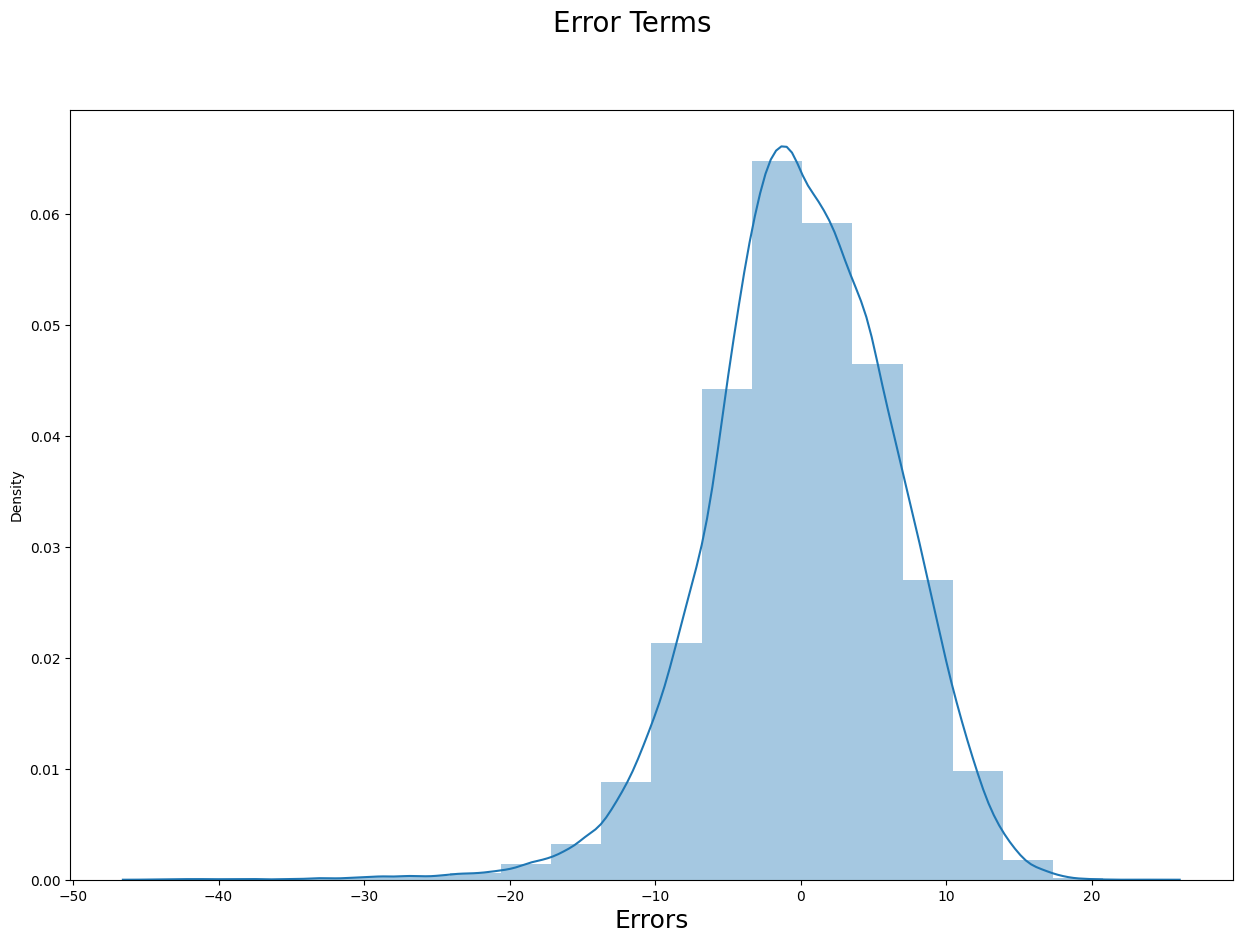

In [484]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
fig = plt.figure(figsize=(15, 10))
sns.distplot((y_train_pred - y_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

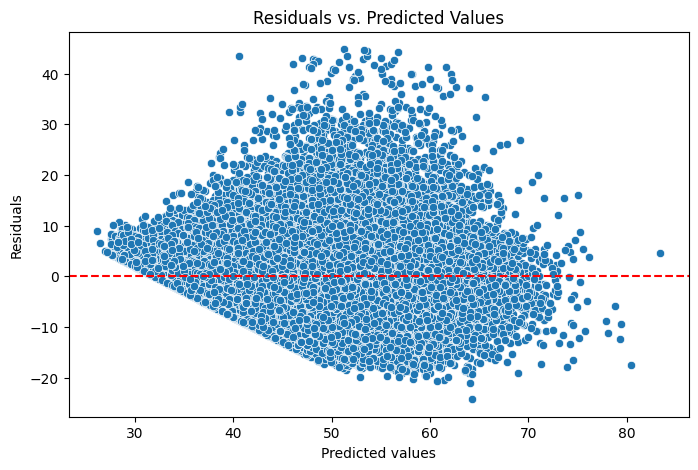

In [485]:
residuals = y_train - y_train_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

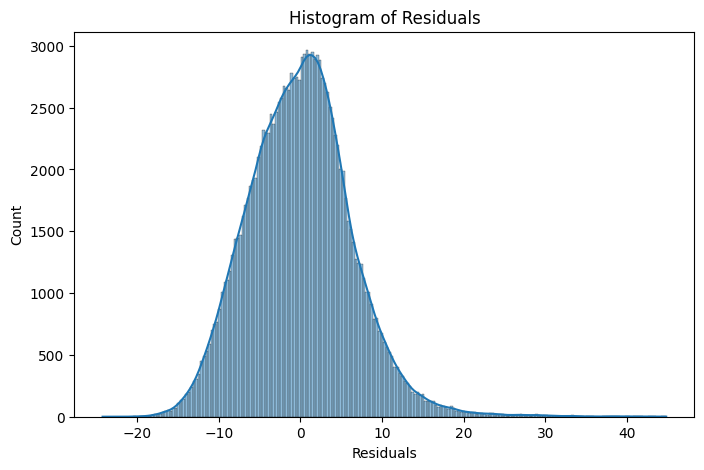

In [486]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

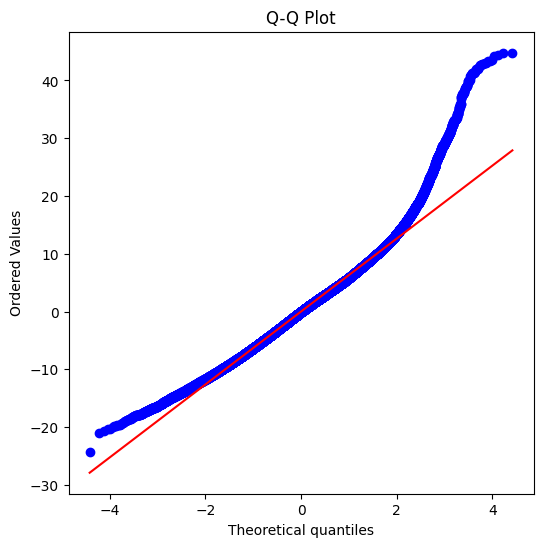

In [487]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Inferences:

The model is fitting the training set and is predicting with less residual errors.
The mean is centered around 0, which is what we want.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> market_id, store_primary_category, order_protocol and Day(which is obtained later)



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> It means that 20% of the data will be split and considered as test data. 80% of data is available as part of the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Identify based on the min/max/mean of the numerical columns. And check if it makes sense. For example, if distance is zero, but timetaken is longer then, it can be considered as an outlier.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Distance, subtotal, total_outstanding_orders



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> It is an algorithm that predicts a target variable that is dependent on one or more input features, by making an assumption that the inputs and the target variable has a linear relationship between them.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
*  Simple Linear Regression works on 1 feature to 1 target variable, and predicts the values of target feature, assuming a linear relationship.
*  Multiple linear regression takes into account the fact that more than 1 input feature can have a say on the target feature, and these features also follows the assumption that there is a linear relationship between them.

* Simple Regression : y = w0 + w1 * x(where w0 is the constant and w1 is the co-efficient of x)
* Multilinear regression : y = w0 + w1*x1 + w2*x2 + ... ( where w0, w1, w2 are the weights/co-efficients and x1, x2, ... are the features.)




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Cost function measures the error that is observed in prediction.
It can be minimized by calculating the derivatives and equating it to 0.
By this we can minimize the cost function, giving optimized values for the co-efficients.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
Underfitting is when it is poorly fitting the training set as well as test set(unseen data)
Overfitting is when it works well on training set but not the same with respect to test set.

Underfitting is when the model is unable to capture the underlying pattern in the data.
Overfitting is when the model is very complex and picks up noise along with the pattern.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> It helps to identify if the model is able to predict the data, and if yes, what is the residual error observed.
When the errors are plotted, it should be normally distributed.